# initilizing inputs and outputs
in the first step we need to register points that are filled

In [ ]:
X77 = ((0,0), (0,6),
       (1,1), (1,5),
       (2,2), (2,4),
       (3,3),
       (4,2), (4,4),
       (5,1), (5,5),
       (6,0), (6,6))

X53 = ((1,0), (1,2),
       (2,1),
       (3,0), (3,2))

Y77 = ((0,1), (0,5),
       (1,1), (1,5),
       (2,2), (2,4),
       (3,3),
       (4,3),
       (5,3),
       (6,3))

Y53 = ((0,0), (0,2),
       (1,0), (1,1), (1,2),
       (2,1),
       (3,1),
       (4,1))

Z77 = ((0,1), (0,2), (0,3), (0,4), (0,5),
       (1,5),
       (2,4),
       (3,3),
       (4,2),
       (5,1),
       (6,1), (6,2), (6,3), (6,4), (6,5))

Z53 = ((0,0), (0,1), (0,2),
       (1,2),
       (2,1),
       (3,0),
       (4,0), (4,1), (4,2))

ins = [X77, Y77, Z77]
outs = [X53, Y53, Z53]

# depicting letters and making their bipolar matrices


In [ ]:
import numpy as np

def depict(points, size, verbose=False, mat_en = False):
  matrix = np.zeros(size)-1
  for i,j in points:
    matrix[i][j] = 1
  
  if verbose:
    for i in matrix:
      for j in i:
        if j == 1:
          print('#', end="")
        elif j == -1:
          print(".", end="")
        else:
          print(" ", end="")
      print("\r")
  if mat_en:
    return matrix

def depict_array(matrix):
  for i in matrix:
      for j in i:
        if j == 1:
          print('#', end="")
        elif j == -1:
          print(".", end="")
        else:
          print(" ", end="")
      print("\r")

In [ ]:
for i in range(3):
  ins[i] = depict(ins[i], (7,7), verbose=True, mat_en=True)
  outs[i] = depict(outs[i], (5,3), verbose=True, mat_en=True)
  print("++++++++")

#.....#
.#...#.
..#.#..
...#...
..#.#..
.#...#.
#.....#
...
#.#
.#.
#.#
...
++++++++
.#...#.
.#...#.
..#.#..
...#...
...#...
...#...
...#...
#.#
###
.#.
.#.
.#.
++++++++
.#####.
.....#.
....#..
...#...
..#....
.#.....
.#####.
###
..#
.#.
#..
###
++++++++


# Calculating weight using Hebbian Learning Rule
then checking if the network managed to memorize inputs

In [ ]:
def calc_weight(inputs, outputs):
  s = []
  t = []
  input_shape = inputs[0].shape
  output_shape = outputs[0].shape
  n = np.nanprod(input_shape)
  m = np.nanprod(output_shape)

  for i in range(len(inputs)):
    s.append(inputs[i].reshape((n,1)))
    t.append(outputs[i].reshape((1,m)))

  W = np.zeros((n, m))
  for i in range(len(inputs)):
    W += s[i] * t[i]

  return W

In [ ]:
def activation(mat):
  return np.where(mat > 0, 1., -1.)

def prediction(input, weight, output_shape = (5,3)):
  pred = input.reshape((1,np.nanprod(input.shape))).dot(weight)
  pred = pred.reshape(output_shape)
  pred = activation(pred)
  return pred

In [ ]:
weight = calc_weight(ins, outs)

In [ ]:
for i in range(len(ins)):
  pred = prediction(ins[i], weight)
  if np.all(pred == outs[i]):
    print("The pattern #%d is correctly saved" %i)
  else:
    print("pattern #%d is NOT correctly saved" %i)

The pattern #0 is correctly saved
The pattern #1 is correctly saved
The pattern #2 is correctly saved


# Adding noise to the inputs 

In [ ]:
import random 
from copy import deepcopy

def noisy(input, percentage):
  length = len(input)
  shape = input[0].shape
  shape_prd = np.nanprod(shape)
  lst = list(range(shape_prd))
  new_in = []
  for i in range(length):
    indx = random.sample(lst, int(shape_prd* percentage))
    in_ = deepcopy(input[i].reshape((shape_prd,)))
    in_[indx] = in_[indx] * -1
    new_in.append(in_.reshape(shape))
  return new_in

## 15 % noise

In [ ]:
new_ins = noisy(ins, 0.15)

In [ ]:
for i in range(3):
  depict_array(ins[i])
  print('\n')
  depict_array(new_ins[i])
  print("--------")

#.....#
.#...#.
..#.#..
...#...
..#.#..
.#...#.
#.....#


##...##
.....#.
..#....
...#.#.
..#.#.#
.#...#.
#......
--------
.#...#.
.#...#.
..#.#..
...#...
...#...
...#...
...#...


.....#.
.....#.
..#.#..
#..###.
...#...
#..#...
...#.#.
--------
.#####.
.....#.
....#..
...#...
..#....
.#.....
.#####.


.##.##.
#......
....#.#
...#...
..#.#..
.#.#...
..####.
--------


### Cheking if the network still remember inputs that memorized before


In [ ]:
for i in range(len(ins)):
  pred = prediction(new_ins[i], weight)
  if np.all(pred == outs[i]):
    print("pattern #%d is correctly saved" %i)
  else:
    print("pattern #%d is NOT correctly saved" %i)
  depict_array(pred)

pattern #0 is NOT correctly saved
#.#
#.#
.#.
#..
.#.
pattern #1 is correctly saved
#.#
###
.#.
.#.
.#.
pattern #2 is correctly saved
###
..#
.#.
#..
###


## 40 % noise

In [ ]:
new_ins = noisy(ins, 0.4)

In [ ]:
for i in range(3):
  depict_array(ins[i])
  print('\n')
  depict_array(new_ins[i])
  print("--------")

#.....#
.#...#.
..#.#..
...#...
..#.#..
.#...#.
#.....#


####..#
.....##
.#.##.#
#..###.
#...#.#
##.#.#.
#.#.#.#
--------
.#...#.
.#...#.
..#.#..
...#...
...#...
...#...
...#...


..#.#.#
.##..#.
.##....
...##.#
#####..
#....#.
.#.#.#.
--------
.#####.
.....#.
....#..
...#...
..#....
.#.....
.#####.


#.##.##
..#.##.
..#..#.
.......
#..####
.......
.##.#..
--------


### Cheking if the network still remember inputs that memorized before


In [ ]:
for i in range(len(ins)):
  pred = prediction(new_ins[i], weight)
  if np.all(pred == outs[i]):
    print("pattern #%d is correctly saved" %i)
  else:
    print("pattern #%d is NOT correctly saved" %i)
  depict_array(pred)

pattern #0 is correctly saved
...
#.#
.#.
#.#
...
pattern #1 is NOT correctly saved
#.#
#.#
.#.
#..
.#.
pattern #2 is NOT correctly saved
#.#
#.#
.#.
#..
.#.


# losing information

In [ ]:
import random 
from copy import deepcopy

def lose_inf(input, percentage):
  length = len(input)
  shape = input[0].shape
  shape_prd = np.nanprod(shape)
  lst = list(range(shape_prd))
  new_in = []
  for i in range(length):
    indx = random.sample(lst, int(shape_prd* percentage))
    in_ = deepcopy(input[i].reshape((shape_prd,)))
    in_[indx] = in_[indx] * 0
    new_in.append(in_.reshape(shape))
  return new_in

## 15 % loss

In [ ]:
new_ins = lose_inf(ins, 0.15)

In [ ]:
for i in range(3):
  depict_array(ins[i])
  print('\n')
  depict_array(new_ins[i])
  print("--------")

#.....#
.#...#.
..#.#..
...#...
..#.#..
.#...#.
#.....#


#.....#
.#...# 
..#. ..
... . .
 .#.#. 
.#...#.
#.... #
--------
.#...#.
.#...#.
..#.#..
...#...
...#...
...#...
...#...


.#...# 
.#...#.
..#.# .
...# ..
.. #...
..  ...
...#. .
--------
.#####.
.....#.
....#..
...#...
..#....
.#.....
.#####.


 ## ##.
.....#.
  ..# .
...#...
..#....
 #.....
.##### 
--------


### Cheking if the network still remember inputs that memorized before


In [ ]:
for i in range(len(ins)):
  pred = prediction(new_ins[i], weight)
  if np.all(pred == outs[i]):
    print("pattern #%d is correctly saved" %i)
  else:
    print("pattern #%d is NOT correctly saved" %i)
  depict_array(pred)

pattern #0 is correctly saved
...
#.#
.#.
#.#
...
pattern #1 is NOT correctly saved
#.#
#.#
.#.
#..
.#.
pattern #2 is correctly saved
###
..#
.#.
#..
###


## 40 % loss

In [ ]:
new_ins = lose_inf(ins, 0.4)

In [ ]:
for i in range(3):
  depict_array(ins[i])
  print('\n')
  depict_array(new_ins[i])
  print("--------")

#.....#
.#...#.
..#.#..
...#...
..#.#..
.#...#.
#.....#


# . .. 
. . .#.
..# # .
...   .
 .#. . 
. .  #.
#. . . 
--------
.#...#.
.#...#.
..#.#..
...#...
...#...
...#...
...#...


.  ..# 
 #.  #.
. #. ..
. .#. .
  . .. 
 . #.. 
... .. 
--------
.#####.
.....#.
....#..
...#...
..#....
.#.....
.#####.


 ### #.
 . ..# 
 . . . 
. .#...
..#.  .
  .... 
  #  #.
--------


### Cheking if the network still remember inputs that memorized before


In [ ]:
for i in range(len(ins)):
  pred = prediction(new_ins[i], weight)
  if np.all(pred == outs[i]):
    print("pattern #%d is correctly saved" %i)
  else:
    print("pattern #%d is NOT correctly saved" %i)
  depict_array(pred)

pattern #0 is correctly saved
...
#.#
.#.
#.#
...
pattern #1 is correctly saved
#.#
###
.#.
.#.
.#.
pattern #2 is correctly saved
###
..#
.#.
#..
###


# Accuracy

In [ ]:
def acc(inputs, outputs, weight, prcnt, noise=False, loss=False):
  cnt = []
  cnt_ = 0
  if noise:
    for i in range(1000):
      cnt_ = 0
      new_inputs = noisy(inputs, prcnt)
      for j in range(len(inputs)):
        prd = prediction(new_inputs[j], weight)
        if np.all(prd == outputs[j]):
          cnt_+=1
      # cnt.append(cnt_)
      if cnt_ == 3:
        cnt.append(3)
      else:
        cnt.append(0)
  if loss:
    for i in range(1000):
      cnt_ = 0
      new_inputs = lose_inf(inputs, prcnt)
      for j in range(len(inputs)):
        prd = prediction(new_inputs[j], weight)
        if np.all(prd == outputs[j]):
          cnt_+=1
      if cnt_ == 3:
        cnt.append(3)
      else:
        cnt.append(0)

  return  round(100 * np.count_nonzero(np.array(cnt))/1000 , 2), cnt

## noisy


### 15 %


In [ ]:
acc(ins,outs,weight, 0.15, noise=True)[0]

51.7

### 40 %

In [ ]:
acc(ins,outs, weight, 0.4, noise=True)[0]

11.2

## loss

### 15 %

In [ ]:
acc(ins,outs, weight, 0.15, loss=True)[0]

(68.4,
 [3,
  3,
  3,
  3,
  3,
  0,
  0,
  3,
  0,
  0,
  3,
  3,
  3,
  3,
  0,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  0,
  3,
  0,
  3,
  3,
  3,
  0,
  3,
  0,
  3,
  3,
  3,
  3,
  0,
  3,
  3,
  3,
  0,
  0,
  3,
  3,
  3,
  3,
  0,
  3,
  3,
  3,
  0,
  0,
  3,
  3,
  0,
  3,
  3,
  3,
  0,
  3,
  3,
  0,
  3,
  3,
  3,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  3,
  0,
  3,
  3,
  3,
  0,
  0,
  3,
  3,
  0,
  3,
  0,
  3,
  3,
  3,
  3,
  0,
  3,
  0,
  3,
  3,
  3,
  0,
  3,
  3,
  0,
  3,
  3,
  3,
  3,
  0,
  3,
  3,
  0,
  3,
  3,
  3,
  0,
  3,
  3,
  3,
  3,
  3,
  3,
  0,
  0,
  3,
  0,
  0,
  3,
  3,
  0,
  0,
  3,
  0,
  0,
  3,
  3,
  0,
  3,
  0,
  3,
  0,
  0,
  0,
  0,
  3,
  3,
  0,
  0,
  0,
  0,
  3,
  0,
  3,
  0,
  3,
  0,
  3,
  3,
  3,
  0,
  3,
  0,
  0,
  3,
  3,
  3,
  3,
  3,
  0,
  3,
  3,
  3,
  0,
  3,
  0,
  3,
  3,
  3,
  3,
  3,
  0,
  3,
  0,
  3,
  3,
  0,
  3,
  3,
  3,
  0,
  0,
  3,
  3,
  0,
  3,
  3,
  3,
  3,
  3,
  3

### 40 %

In [ ]:
acc(ins,outs,weight, 0.4, loss=True)

(48.6,
 [3,
  3,
  3,
  0,
  3,
  3,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  0,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  0,
  0,
  3,
  0,
  0,
  3,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  3,
  3,
  0,
  3,
  3,
  0,
  3,
  3,
  0,
  3,
  0,
  0,
  3,
  3,
  0,
  0,
  0,
  0,
  3,
  0,
  3,
  0,
  0,
  0,
  3,
  3,
  3,
  0,
  0,
  0,
  3,
  3,
  0,
  0,
  0,
  0,
  3,
  3,
  0,
  0,
  3,
  0,
  3,
  3,
  3,
  0,
  3,
  0,
  0,
  0,
  3,
  3,
  0,
  3,
  0,
  0,
  3,
  0,
  0,
  0,
  3,
  3,
  0,
  0,
  0,
  3,
  0,
  3,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  3,
  3,
  3,
  0,
  0,
  0,
  3,
  0,
  0,
  3,
  0,
  0,
  3,
  0,
  0,
  3,
  0,
  0,
  3,
  0,
  3,
  3,
  0,
  3,
  0,
  0,
  0,
  0,
  0,
  0,
  3,
  3,
  0,
  0,
  3,
  0,
  0,
  0,
  0,
  3,
  0,
  0,
  3,
  0,
  3,
  3,
  3,
  0,
  0,
  0,
  3,
  3,
  0,
  3,
  0,
  3,
  0,
  3,
  0,
  0,
  3,
  0,
  3,
  3,
  3,
  3,
  0,
  3,
  3,
  0

## accuracy vs percentage

### adding noise

In [ ]:
import matplotlib.pyplot as plt

data = []
for i in range(100):
  (prcntg, _) = acc(ins, outs,weight, i/100, noise=True)
  data.append(prcntg)

Text(0.5, 1.0, 'accuracy over increasing percentage')

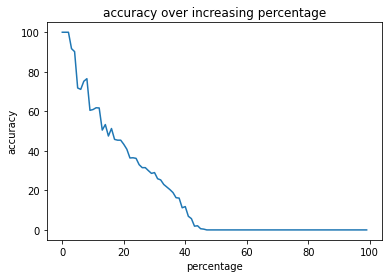

In [ ]:
plt.plot(data)
plt.xlabel('percentage')
plt.ylabel('accuracy')
plt.title('accuracy over increasing percentage')

### losing information

In [ ]:
data = []
for i in range(100):
  (prcntg, _) = acc(ins, outs, weight, i/100, loss=True)
  data.append(prcntg)

Text(0.5, 1.0, 'accuracy over increasing percentage')

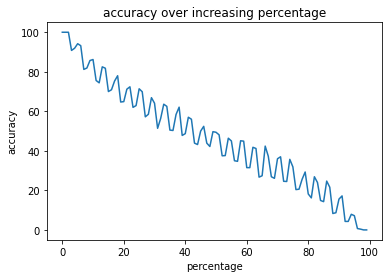

In [ ]:
plt.plot(data)
plt.xlabel('percentage')
plt.ylabel('accuracy')
plt.title('accuracy over increasing percentage')